1. **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart)
2. **Run all cells** (in the menubar, select Cell$\rightarrow$Run All).
3. __Use the__ `Validate` __button in the Assignments tab before submitting__.

__Include comments, derivations, explanations, graphs, etc.__ 

You __work in groups__ (= 3 people). __Write the full name and S/U-number of all team members!__

---


# Assignment 2 (Statistical Machine Learning 2024)
# **Deadline: 18 October 2024**

## Instructions
* Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE` __including comments, derivations, explanations, graphs, etc.__ 
Elements and/or intermediate steps required to derive the answer have to be in the report. If an exercise requires coding, explain briefly what the code does (in comments). All figures should have titles (descriptions), axis labels, and legends.
* __Please use LaTeX to write down equations/derivations/other math__! How to do that in Markdown cells can be found [here](https://www.fabriziomusacchio.com/blog/2021-08-10-How_to_use_LaTeX_in_Markdown/), a starting point for various symbols is [here](https://www.overleaf.com/learn/latex/Mathematical_expressions).
* Please do __not add new cells__ to the notebook, try to write the answers only in the provided cells. Before you turn the assignment in, make sure everything runs as expected.
* __Use the variable names given in the exercises__, do not assign your own variable names. 
* __Only one team member needs to upload the solutions__. This can be done under the Assignments tab, where you fetched the assignments, and where you can also validate your submissions. Please do not change the filenames of the individual Jupyter notebooks.

For any problems or questions regarding the assignments, ask during the tutorial or send an email to charlotte.cambiervannooten@ru.nl and janneke.verbeek@ru.nl .

## Introduction
Assignment 2 consists of:
1. Classification and decision theory (30 points),
2. Bayesian linear regression (20 points),
3. __Sequential learning (50 points)__.

## Libraries

Please __avoid installing new packages__, unless really necessary.

In [332]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as ss

# Set fixed random seed for reproducibility
np.random.seed(2022)

## Exercise 3 - Sequential Learning (50 points)
### Part 1: Obtaining the prior
Consider a four dimensional variable $[x_1, x_2, x_3, x_4]^T$, distributed according to a multivariate Gaussian with mean $\tilde{\mathbf{\mu}} = [1,0,1,2]^T$ and covariance matrix $\tilde{\mathbf{\Sigma}}$ given as
\begin{equation}
    \tilde{\mathbf{\Sigma}} =
    \left(\begin{array}{cc|cc} 
    0.14 & -0.3 & 0.0 & 0.2 \\ 
    -0.3 & 1.16 & 0.2 & -0.8 \\ \hline 
    0.0 & 0.2 & 1.0 & 1.0 \\ 
    0.2 & -0.8 & 1.0 & 2.0 \end{array}\right)
    \tag{2}
\end{equation}
We are interested in the conditional distribution over $[x_1, x_2]^T$, given that $x_3 = x_4 = 0$. We know this conditional distribution will also take the form of a Gaussian:
\begin{equation}     
    p\big([x_1,x_2]^T \,|\, x_3 = x_4 = 0 \big) = \mathcal{N}([x_1,x_2]^T | \mathbf{\mu}_p, \mathbf{\Sigma}_{p})
    \tag{3}
\end{equation}
for which the mean and covariance matrix are most easily expressed in terms of the (partitioned) precision matrix (see Bishop,$\S2.3.1$).
#### Part 1.1
Use the partitioned precision matrix $\tilde{\mathbf{\Lambda}} = \tilde{\mathbf{\Sigma}}^{-1}$ to give an explicit expression for the mean $\mathbf{\mu}_p$ and covariance matrix $\mathbf{\Sigma}_p$ of this distribution and calculate their values. (This distribution will be taken as the _prior_ information for the rest of this exercise, hence the subscript $p$). You may use `np.linalg.inv` to calculate matrix inverses.

#### Answer 1.1

**Using Precision Matrix:**

The precision matrix is just the inverse of the covariance matrix $\Lambda \equiv \Sigma^{-1}$ (Bishop 2.68). Where the partitioned prevision matrix is then 
$$
\Lambda = \begin{pmatrix} \Lambda_{aa} & \Lambda_{ab} \\ \Lambda_{ba} & \Lambda_{bb} \end{pmatrix} \tag{Bishop 2.69}
$$

Given this we can calculate the covariance of the conditional distribution using $\Sigma_{a|b} = \Lambda_{aa}^{-1}$. We can also calculate the mean of the conditional distribution using 

$$
\mu_{a|b} = \mu_a - \Lambda_{aa}^{-1}\Lambda_{ab}(x_b-\mu_b) \tag{Bishop 2.75}
$$

Lets begin by finding the precision matrix (this was done using `nplinalg.inv`):
$$
\Lambda = 
\begin{pmatrix}
60 & 50 & -48 & 38 \\
50 & 50 & -50 & 40 \\
-48 & -50 & 52.4 & -41.4 \\
38 & 40 & -41.4 & 33.4
\end{pmatrix}
$$

Now we can find $\Sigma_{a|b}$:
$$
\Sigma_{a|b} = \Lambda_{aa}^{-1} = 
\begin{pmatrix}
60 & 50 \\
50 & 50
\end{pmatrix}^{-1}
=
\begin{pmatrix}
0.1 & -0.1 \\
-0.1 & 0.12
\end{pmatrix}
$$

Lets calculate $\mu_{a|b}$ now:

$$
\mu_{a|b} = \mu_a - \Lambda_{aa}^{-1} \Lambda_{ab} (x_b - \mu_b) 
= \mu_a - \Sigma_{a|b} \Lambda_{ab} (x_b - \mu_b)
$$

$$
= \begin{pmatrix} 1 \\ 0 \end{pmatrix} - 
\begin{pmatrix} 0.1 & -0.1 \\ -0.1 & 0.12 \end{pmatrix} 
\begin{pmatrix} -48 & 38 \\ -50 & 40 \end{pmatrix}
\left( \begin{pmatrix} 0 \\ 0 \end{pmatrix} - \begin{pmatrix} 1 \\ 2 \end{pmatrix} \right)
$$

$$
= \begin{pmatrix} 1 \\ 0 \end{pmatrix} - 
\begin{pmatrix} 0.2 & -0.2 \\ -1.2 & 1 \end{pmatrix} 
\begin{pmatrix} -1 \\ -2 \end{pmatrix}
$$

$$
= \begin{pmatrix} 0.8 \\ 0.8 \end{pmatrix}
$$



**This is a different way of doing it with the covariance matrix:**

According to Bishop, given a joint Guassian distribution $\mathcal{N}(\boldsymbol{x}|\mu, \Sigma$) with $\Lambda \equiv \Sigma^{-1}$ and

$$
x = 
\begin{pmatrix}
x_a \\ x_b 
\end{pmatrix},

\mu = 
\begin{pmatrix}
\mu_a\\ \mu_b
\end{pmatrix}
$$


$$
\Sigma = 
\begin{pmatrix}
\Sigma_{aa} & \Sigma_{ab}\\
\Sigma_{ba} & \Sigma_{bb}
\end{pmatrix},

\Lambda = 
\begin{pmatrix}
\Lambda_{aa} & \Lambda_{ab}\\
\Lambda_{ba} & \Lambda_{bb}
\end{pmatrix}
$$

Then the conditional distribution is defined by:
$$
\begin{align}
    \mu_p=\mu_{a|b} &= \mu_a + \Sigma_{ab} \Sigma_{bb}^{-1} (x_b - \mu_b) \tag{Bishop 2.81} \\
    \Sigma_p=\Sigma_{a|b} &= \Sigma_{aa} - \Sigma_{ab} \Sigma_{bb}^{-1} \Sigma_{ba} \tag{Bishop 2.82}
\end{align}
$$

Now lets define our variables to perform the calculation:
 
$$
\mu_{a|b} = \mu_a + \Sigma_{ab} \Sigma_{bb}^{-1} (x_b - \mu_b)
$$

$$
\Sigma_{a|b} = \Sigma_{aa} - \Sigma_{ab} \Sigma_{bb}^{-1} \Sigma_{ba}
$$

$$
X_a = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}, \quad
X_b = \begin{bmatrix} x_3 \\ x_4 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}, \quad
\mu_a = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad
\mu_b = \begin{bmatrix} 1 \\ 2 \end{bmatrix}
$$

$$
\Sigma_{aa} = \begin{bmatrix} 0.14 & -0.3 \\ -0.3 & 1.16 \end{bmatrix}, \quad
\Sigma_{bb} = \begin{bmatrix} 1.0 & 1 \\ 1 & 2 \end{bmatrix}, \quad
\Sigma_{ab} = \begin{bmatrix} 0.0 & 0.2 \\ 0.2 & -0.8 \end{bmatrix}, \quad
\Sigma_{ba} = \begin{bmatrix} 0.0 & 0.2 \\ 0.2 & -0.8 \end{bmatrix}
$$

To calculate $\Sigma_{bb}^{-1}$, we can use the following formula to calculate the inverse of a 2 by 2 matrix:

$$
\text{If } A = \begin{bmatrix} a & b \\ c & d \end{bmatrix} \text{ then } A^{-1} = \frac{1}{\text{det}(A)} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}
$$

Thus,

$$
\Sigma_{bb}^{-1} = \frac{1}{(1)(2) - (1)(1)} \begin{bmatrix} 2.0 & -1.0 \\ -1.0 & 1.0 \end{bmatrix} = \begin{bmatrix} 2.0 & -1.0 \\ -1.0 & 1.0 \end{bmatrix}
$$

Now, solving for $\mu_{a|b} = \mu_p$:

$$
\mu_{a|b} = \mu_a + \Sigma_{ab} \Sigma_{bb}^{-1} (x_b - \mu_b)
$$

$$
= \begin{bmatrix} 1 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.0 & 0.2 \\ 0.2 & -0.8 \end{bmatrix} \begin{bmatrix} 2.0 & -1.0 \\ -1.0 & 1.0 \end{bmatrix} \left(\begin{bmatrix} 0 \\ 0 \end{bmatrix} - \begin{bmatrix} 1 \\ 2 \end{bmatrix}\right)
$$

$$
= \begin{bmatrix} 1 \\ 0 \end{bmatrix} + \begin{bmatrix} -0.2 & 0.2 \\ 1.2 & -1 \end{bmatrix} \begin{bmatrix} -1 \\ -2 \end{bmatrix}
$$

$$
= \begin{bmatrix} 1 \\ 0 \end{bmatrix} + \begin{bmatrix} -0.2 \\ 0.8 \end{bmatrix} = \boldsymbol{\begin{bmatrix} 0.8 \\ 0.8 \end{bmatrix}}
$$

The corresponding calculation can be done using Bishop equation (2.82) to find $\Sigma_{a|b} = \Sigma_{p}$. For brevity the final result is presented below and it is also calculated in code explicitly:

$$
\Sigma_{a|b} = \Sigma_{p} = \begin{bmatrix} 0.1 & -0.1 \\ -0.1 & 0.12\end{bmatrix}
$$


Please also provide the values of $\mathbf{\mu}_p$ and $\mathbf{\Sigma}_p$ in code.

In [333]:
# TODO: I think they want an explicit math calculation, not just code here...
"""
Calculate the mean and covariance. Note: mu is a column vector.
mu_p : array
    The mean.
Sigma_p : matrix
    The covariance.
"""
Sigma_tilde = np.array([[0.14, -0.3, 0.0, 0.2],
                       [-0.3, 1.16, 0.2, -0.8],
                       [0.0, 0.2, 1.0, 1.0],
                       [0.2, -0.8, 1.0, 2.0]])

Sigma_aa = Sigma_tilde[0:2,0:2]
Sigma_ab = Sigma_tilde[0:2,2:4]
Sigma_ba = Sigma_tilde[2:4,0:2]
Sigma_bb = Sigma_tilde[2:4,2:4]

# --------- Calculate Sigma_p ------------
# Future reference: 
# @ symbol is used for matrix multiplication
# * is used for elementwise mupliplication

# Using precision matrix
Precision_tilde = np.linalg.inv(Sigma_tilde)
Precision_aa = Precision_tilde[0:2, 0:2]
Sigma_p_1 = np.linalg.inv(Precision_aa)
print("Sigma_p_1:\n", Sigma_p_1)


precision_ab = Precision_tilde[0:2, 2:4]
print(Sigma_p_1@precision_ab)
print(np.array([[1],[0]]-Sigma_p_1@precision_ab@np.array([[-1],[-2]])))

# Using covariance matrix: (2.82) from Bishop
Sigma_p_2 = Sigma_aa - Sigma_ab @ np.linalg.inv(Sigma_bb) @ Sigma_ba
print("Sigma_p_2:\n", Sigma_p_2)

# Check they are the same
assert np.allclose(Sigma_p_1, Sigma_p_2), "Matrices should be equal!"

# --------- Calculate Mu_p ---------------
mu_tilde = np.array([1,0,1,2])
x_b = np.array([0, 0])
mu_a = mu_tilde[0:2]
mu_b = mu_tilde[2:4]

# Using (2.81) from Bishop
mu_p = mu_a + Sigma_ab @ np.linalg.inv(Sigma_bb) @ (x_b-mu_b)
print("mu_p:\n", mu_p)
# saving a Sigma_p for the benefit of the automatic checking:
Sigma_p = Sigma_p_1

Sigma_p_1:
 [[ 0.1  -0.1 ]
 [-0.1   0.12]]
[[ 0.2 -0.2]
 [-1.2  1. ]]
[[0.8]
 [0.8]]
Sigma_p_2:
 [[ 0.1  -0.1 ]
 [-0.1   0.12]]
mu_p:
 [0.8 0.8]


In [334]:
"""
Hidden test for checking the value of mu_p and Sigma_p.
"""

'\nHidden test for checking the value of mu_p and Sigma_p.\n'

#### Part 1.2
Generate random number pairs distributed according to the distribution in (3).
Initialize your random generator and then draw a $single$ pair
\begin{equation}
    \mathbf{\mu}_t = [\mu_{t_1}, \mu_{t_2}]^T
    \tag{4}
\end{equation}
from this distribution. This will be the "true" mean, hence the subscript $t$. Draw 100 more pairs from the same distribution and plot them together with $\mathbf{\mu}_t$ to see where the "true" mean falls within the prior distribution.

**Hint**: You can use the function `np.random.multivariate_normal`.

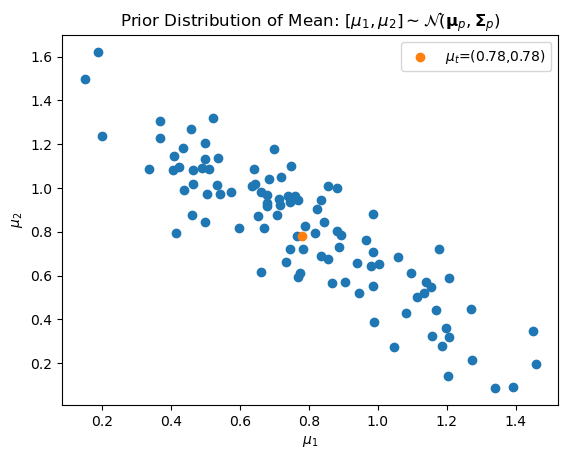

In [335]:
"""
Plot of the randomly generated number pairs and the "true" mean.
"""
# YOUR CODE HERE
mu_t = np.random.multivariate_normal(mu_p, Sigma_p_2)
prior = np.random.multivariate_normal(mu_p, Sigma_p_2, 100)

plt.scatter(prior[:,0], prior[:,1])
plt.scatter(mu_t[0], mu_t[1], label=r"$\mu_t$="+f"({mu_t[0]:.2f},{mu_t[1]:.2f})")
plt.title(r"Prior Distribution of Mean: $[\mu_1, \mu_2] \sim \mathcal{N}(\mathbf{\mu}_p, \mathbf{\Sigma}_{p})$")
plt.xlabel(r"$\mu_1$")
plt.ylabel(r"$\mu_2$")
plt.legend();


#### Part 1.3
Make a surface plot of the probability density of the distribution (3).

**Hint**: use the function `ss.multivariate_normal` to calculate the probability density of a multivariate Gaussian random variable. The functions `np.mgrid` and `Axes3D.plot_surface` may also prove useful.

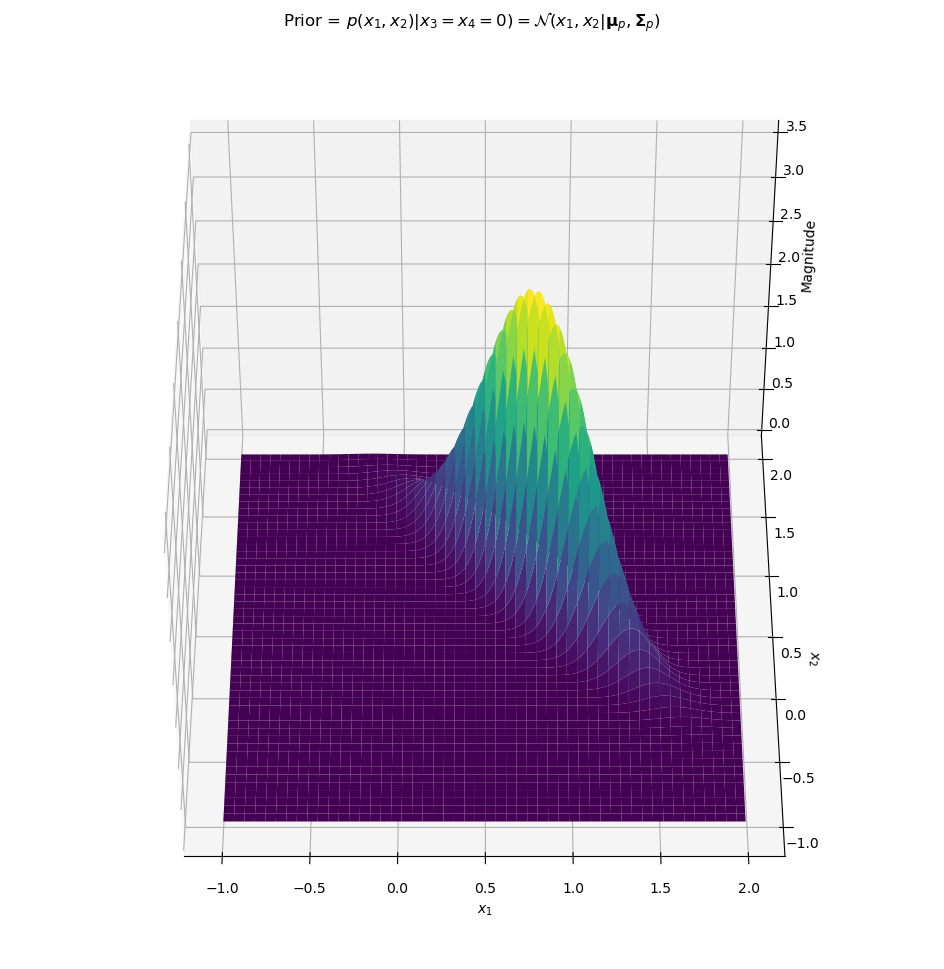

In [336]:
#% matplotlib notebook
"""
Plot of the probability density.
"""
from matplotlib import cm


x, y = np.mgrid[-1:2:.01, -1:2:.01]
pos = np.dstack((x, y))
rv = ss.multivariate_normal(mu_p, Sigma_p_2)
z = rv.pdf(pos)

fig2 = plt.figure(figsize=(12,12));
ax2 = fig2.add_subplot(111, projection="3d");
ax2.view_init(elev=45, azim=-90);
ax2.plot_surface(x, y, z, cmap="viridis", edgecolor='none');
ax2.set_xlabel(r"$x_1$");
ax2.set_ylabel(r"$x_2$");
ax2.set_zlabel("Magnitude");
ax2.set_title(r"Prior = $p(x_1,x_2)|x_3 = x_4 = 0) = \mathcal{N}(x_1,x_2|\mathbf{\mu}_p, \mathbf{\Sigma}_{p})$");

### Part 2: Generating the data
Here we assume we are dealing with a 2D-Gaussian data generating process 
\begin{equation}
p(\mathbf{x}) = \mathcal{N}(\mathbf{x} | \mathbf{\mu}, \mathbf{\Sigma}) \tag{5}
\end{equation}
For the mean $\mathbf{\mu}$, we will use the value $\mathbf{\mu}_t$ drawn in (4) to _generate_ the data. Subsequently, we will pretend that we do not know this "true" value $\mathbf{\mu}_t$ of $\mathbf{\mu}$, and estimate $\mathbf{\mu}$ from the data. For the covariance matrix $\mathbf{\Sigma}$ we will use the "true" value
\begin{equation}
    \mathbf{\Sigma}_t = \left(\begin{array}{cc} 2.0 & 0.8 \\ 0.8 & 4.0 \end{array} \right) \tag{6}
\end{equation}
to generate the data.
#### Part 2.1
Generate at least 1000 data pairs $\{x_i, y_i\}$, distributed according to equation (5) with $\mathbf{\mu} = \mathbf{\mu}_t$ and $\mathbf{\Sigma} = \mathbf{\Sigma}_t$. Make a scatter plot of these noisy observations and superimpose the plot from Part 1.2 (the prior distribution of the mean) for additional context.

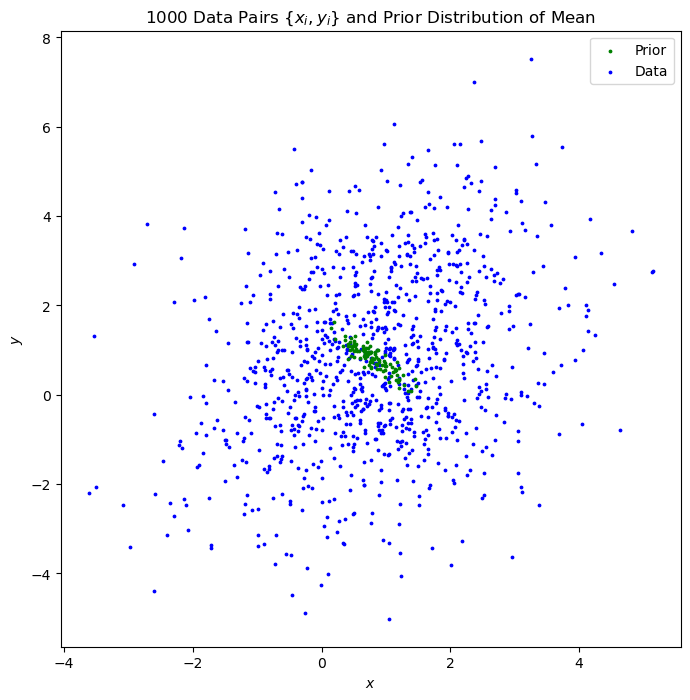

In [337]:
"""
Generate 1000 data pairs.
"""
Sigma_t = np.array([[2.0, 0.8], [0.8, 4.0]])
data = np.random.multivariate_normal(mu_t, Sigma_t, 1000)
plt.figure(figsize=(8,8))
plt.scatter(prior[:,0], prior[:,1], s=3, color="green", label = "Prior")
plt.scatter(data[:,0], data[:,1], s=3, color="blue", label="Data", zorder=-1)
plt.legend()
plt.ylabel(r"$y$")
plt.xlabel(r"$x$")
plt.title(r"1000 Data Pairs $\{x_i, y_i\}$ and Prior Distribution of Mean");


#### Part 2.2
From now on, we will assume (pretend) that the "true" mean $\mathbf{\mu}_t$ is unknown and estimate $\mathbf{\mu}$ from the data. Calculate the maximum likelihood estimate of $\mathbf{\mu}_{\mathrm{ML}}$ and $\mathbf{\Sigma}_{\mathrm{ML}}$ for the data, and also an unbiased estimate of $\mathbf{\Sigma}$ (see Bishop, $\S2.3.4$).

#### Answer 2.2

According to Bishop, the maximum likelihood of the estimate of the mean is given by 

$$
\boldsymbol{\mu}_{ML} = \frac{1}{N}\sum_{n=1}^{N}\boldsymbol{X}_n \tag{2.121}
$$

Where $\boldsymbol{X} = (\boldsymbol{x}_1,\dots ,\boldsymbol{x}_N)^T$ is the data set in which the observations are assumed to be drawn independently from a multivariate Guassian distribution. Additionally, $\sum_{ML}$ is given in Bishop as: 

$$
\sum_{ML} = \frac{1}{N}\sum_{n=1}^{N}(\boldsymbol{x}_n-\boldsymbol{\mu}_{ML})(\boldsymbol{x}_n-\boldsymbol{\mu}_{ML})^T \tag{2.122}
$$

We can correct the bias in the covariance matrix by defining $\tilde{\sum_{ML}}$ as

$$
\tilde{\sum_{ML}} = \frac{1}{N-1}\sum_{n=1}^{N}(\boldsymbol{x}_n-\boldsymbol{\mu}_{ML})(\boldsymbol{x}_n-\boldsymbol{\mu}_{ML})^T \tag{2.125}
$$

In [338]:
"""
Calculate the maximum likelihood estimate.
"""
mu_ml = np.sum(data, axis=0)/len(data)
print(f"mu_ml =\n {mu_ml}")

sigma_ml = (data-mu_ml).T@(data-mu_ml)/len(data)
print(f"sigma_ml =\n {sigma_ml}")

tilde_sigma_ml = (data-mu_ml).T@(data-mu_ml)/(len(data)-1)
print(f"tilde_sigma_ml =\n {tilde_sigma_ml}")


mu_ml =
 [0.81266107 0.83997736]
sigma_ml =
 [[1.88372924 0.7714693 ]
 [0.7714693  4.06661805]]
tilde_sigma_ml =
 [[1.88561486 0.77224155]
 [0.77224155 4.07068874]]


Compare the estimates to the true values $\mathbf{\mu}_t$ and $\mathbf{\Sigma}_t$.

The true mean is $\mu_t=(0.78, 0.78)$ while the estimated mean is $\mu_{ML}=(0.81, 0.84)$, so the estimated mean is a little too high, but is expected to converge to the true value in the limit of infinite data points. $\sum_{ML}$ is roughly equivalent to the true $\sum_t$ but is a little lower due to bias. The unbiased version $\tilde{\sum}$ is closer to the true value but also slighly underestimates three of the values, while overestimating the fourth value.

### Part 3: Sequential learning algorithms
We will now estimate the mean $\mathbf{\mu}$ from the generated data and the known variance $\mathbf{\Sigma}_{t}$ _sequentially_, i.e., by considering the data points one-by-one.
#### Part 3.1
Write a procedure that processes the data points $\{\mathbf{x}_n\}$ in the generated file one-by-one, and after each step computes an updated estimate of $\mathbf{\mu}_{\mathrm{ML}}$, the maximum likelihood of the mean (using Bishop, eq.2.126).

We can see the equation for sequential updates is given in Bishop (2.126):

$$
\boldsymbol{\mu^{(N)}_{ML}} = \boldsymbol{\mu^{(N-1)}_{ML}} + \frac{1}{N}(\boldsymbol{x}_N - \boldsymbol{\mu}_{ML}^{(N-1)})
$$

In [339]:
"""
Calculate the maximum likelihood of the mean.
"""
# TODO: Not sure about the initial value for mu_0
mu_0 = np.array([0.5,0.5])
def update_mean(mu, x, n):
    return mu + (x - mu) / n

def mean_max_likelihood(data, mu_0):
    mu_results = np.zeros((len(data), 2))
    mu = mu_0
    for i, x in enumerate(data):
        mu = update_mean(mu, x, i+1)
        mu_results[i] = mu
    return mu_results

ml_results = mean_max_likelihood(data, mu_0)
print(f"Mean maximum likelihood: {ml_results[-1]}")



Mean maximum likelihood: [0.81266107 0.83997736]


##### Answer 3.1
We can see that when we calculate the mean with sequential updates we get $\mu_{ML} = (0.81, 0.84)$ which is the same as when we used all data points at once, which is expected.

Now we also use the prior information $p(\mathbf{\mu}) = \mathcal{N}(\mathbf{\mu} | \mathbf{\mu}_p, \mathbf{\Sigma}_p)$. From the prior, the generated data and the known variance $\mathbf{\Sigma}_t$, we will estimate the mean $\mathbf{\mu}$.
#### Part 3.2
Work out the details of sequential Bayesian inference (see eq.2.144) for the mean $\mathbf{\mu}$. Apply Bayes' theorem in eq. 2.113-2.117 at each step $n=1,\dots,N$ to compute the new posterior mean $\mathbf{\mu}^{(n)}$ and covariance $\mathbf{\Sigma}^{(n)}$ from the old posterior mean $\mathbf{\mu}^{(n-1)}$ and covariance $\mathbf{\Sigma}^{(n-1)}$ after a new point $(\mathbf{x}_n)$ has arrived. Use this updated posterior as the prior in the next step. The first step starts from the original prior (3).

__Note__: Do not confuse the posterior $\mathbf{\Sigma}^{(n)}$ with the known $\mathbf{\Sigma}_t$ of the data generating process. 


__Hints__: Bayes' rule is also valid if earlier acquired information is taken into account, for example if this is earlier seen data $D_{n-1} = \{x_1, \ldots, x_{n-1}\}$. Bayes' rule conditioned on this earlier data is 
$$P(\mu|x_{n},D_{n-1}) \propto P(\mu|D_{n-1}) P(x_{n}|\mu,D_{n-1}).$$
Since $D_{n} = \{x_1, \ldots, x_{n}\}$ this is written more conveniently as
$$P(\mu|D_n) \propto P(\mu|D_{n-1}) P(x_{n}|\mu,D_{n-1}).$$
If given the model parameters $\mu$, the probability distribution of $x_n$ is independent of earlier data $D_{n-1}$, we can further reduce this to
$$P(\mu|D_{n}) \propto P(\mu|D_{n-1}) P(x_{n}|\mu).$$
You should be able to see the relation with (2.144), in particular that the factor between square brackets in (2.144) is to be identified with $P(\mu|D_{n-1})$.

Another important insight is that if $P(\mu|D_{n-1})$ and $P(x_{n}|\mu)$ are of the form (2.113) and (2.114), 
that is, if $P(\mu|D_{n-1})$ is a Gaussian distribution over $\mu$ with a certain mean and covariance (you are free to give these any name, e.g. $\mu^{(n-1)}$, $\Sigma^{(n-1)}$) and if $P(x_{n}|\mu)$ is also Gaussian with a mean that is linear $\mu$, then you can use (2.116) and (2.117) to compute the posterior $P(\mu|D_{n})$, which is therefore also Gaussian.
 
It is your task to show this. To do this you have to figure out the mapping of the variables and parameters in the current exercise, i.e., what is the correspondence between $\mu, x_n, \Sigma_t, \mu^{(n-1)}, \Sigma^{(n-1)}$ etc. with $x,\mu,\Lambda, y,A,b,L$. Don't forget that some quantities can also be zero or and other may be identity matrices.

#### Answer 3.2
We can show the form of the posterior by first writing out all the appropriate terms for the prior, likelihood and posterior

$$
\begin{matrix}
\text{Eq 2.114} &  \text{Exercise} &\text{Guassian} & \text{Bishop} & \text{Description}\\[5pt]
P(\mu)\prod_{n=1}^{N-1}P(x_n|\mu) & P(\mu | D_{n-1}) & \mathcal{N}(\mu^{(n)}|\mu^{(n-1)}, \Sigma^{(n-1)}) & P(x)=\mathcal{N}(x|\mu, \Lambda^{-1}) & \text{Prior}\\[5pt]
P(x_n|\mu) & P(x_n|\mu) & \mathcal{N}(x_n | \mu^{(n-1)}, \Sigma_t) & P(y|x) = \mathcal{N}(y|Ax+b,L^{-1}) & \text{Likelihood}\\[5pt]
P(\mu| D) & P(\mu | D_n) & \text{NA} &P(x|y) = \mathcal{N}(x|\Sigma\{A^TL(y-b)+\Lambda\mu\}, \Sigma) & \text{Posterior}\\
\end{matrix}
$$

Given these associations, we can map our symbols to those of the book:

$$
\text{Mapping}:
\begin{matrix}
\text{Bishop Symbol} & \text{Exercise Symbol}\\
x & \mu^{(n)}\\
\mu & \mu^{(n-1)} \\
\Lambda^{-1} & \Sigma^{(n-1)}\\
y & x_n\\
A & I\\
b & 0\\
L^{-1} & \Sigma_t

\end{matrix}
$$

In this way we can use the equations from Bishop to derive the equations for the posterior mean and covariance matrices. We will need the formula $\Sigma = (\Lambda + A^TLA)^{-1}$:

$$
\Sigma^{n} = ((\Sigma^{(n-1)})^{-1} + (\Sigma_t)^{-1})^{-1}\\[5pt]
P(\mu^{(n)} | x_n) = \mathcal{N}(\mu^{(n)} | \Sigma^{(n)}\{ \text{I}^T\Sigma_t^{-1}(x_n-0)+(\Sigma^{(n-1)})^{-1}\mu^{(n-1)}\}, \Sigma^{(n)})
$$

Thus to answer our final question:
$$
\Sigma^{(n)} = ((\Sigma^{(n-1)})^{-1} + (\Sigma_t)^{-1})^{-1}\\[5pt]
\mu^{(n)} = \Sigma^{(n)}\{\Sigma_t^{-1}(x_n)+(\Sigma^{(n-1)})^{-1}\mu^{(n-1)}\}
$$

#### Part 3.3
Write a procedure that processes the data points $\{\mathbf{x}_n\}$ in the generated file one-by-one, and after each step computes an updated estimate of $\mathbf{\mu}_{\mathrm{MAP}}$ - the maximum of the posterior distribution, using the results of the previous exercise.

In [340]:
"""
Calculate the MAP of the mean.
"""
# YOUR CODE HERE


def update_map(x, Sigma_old, map_old, Sigma_t):
    Sigma = np.linalg.inv(np.linalg.inv(Sigma_old) + np.linalg.inv(Sigma_t))
    map = Sigma@(np.linalg.inv(Sigma_t)@x + np.linalg.inv(Sigma_old)@map_old) 
    return map, Sigma

Sigma = Sigma_p_2
map = mu_p
map_results = np.zeros((len(data), 2))

for i, x in enumerate(data):
    map, Sigma = update_map(x, Sigma, map, Sigma_t)
    map_results[i] = map


Sigma_map = Sigma

print(f"Sigma:\n {Sigma_map}")
print(f"MAP:\n {map}")

Sigma:
 [[0.00168699 0.00030776]
 [0.00030776 0.00316425]]
MAP:
 [0.80719743 0.83080032]


#### Part 3.4
Plot both estimates (ML and MAP) in a single graph (1D or 2D) as a function of the number of data points observed. Indicate the true values $\{\mu_{t_1}, \mu_{t_2}\}$ as well. Evaluate your result.

Make sure you store the values for $\mathbf{\mu}_{\mathrm{ML}}$ and $\mathbf{\mu}_{\mathrm{MAP}}$ at each intermediate step $n$ and use these to plot against each other. Useful graphs to get an impression of the convergence behaviour are:
* lineplots of components of $\mathbf{\mu}_{\mathrm{ML}}^{(n)}$ and $\mathbf{\mu}_{\mathrm{MAP}}^{(n)}$ vs. $n$,
* 2D-plot joining points ($\mathbf{\mu}_{\mathrm{ML}}^{(n)}$, $\mathbf{\mu}_{\mathrm{ML}}^{(n+1)}$) for successive $n$,
* combinations of $\mathbf{\mu}_{\mathrm{ML}}$ and $\mathbf{\mu}_{\mathrm{MAP}}$ components in a single plot,
* the final posterior distribution.

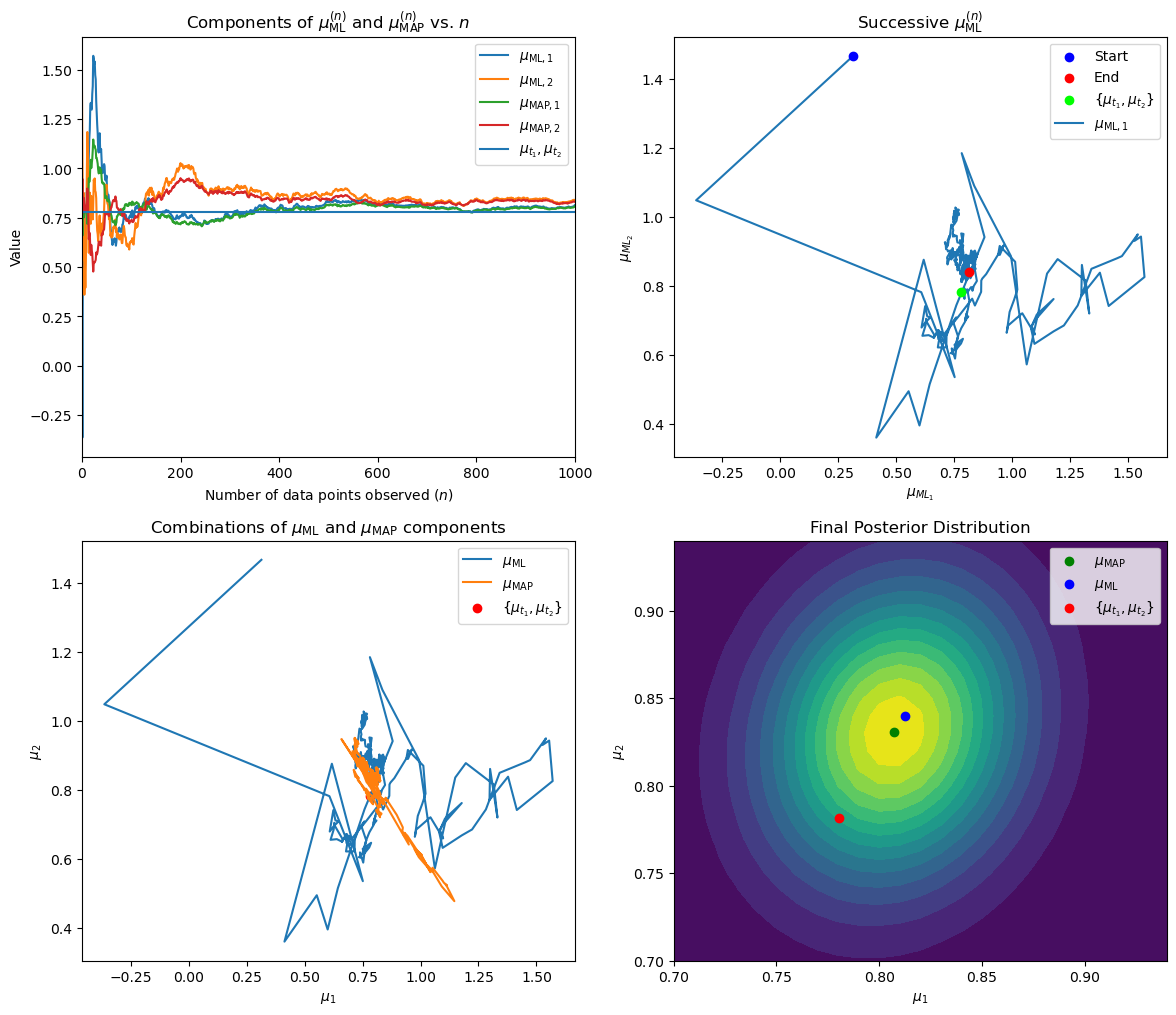

In [341]:
"""mathrm
Plots of ML and MAP estimates.
"""
import numpy as np
import matplotlib.pyplot as plt

mu_t = mu_t  # Replace with actual true values

n_points = len(ml_results)

fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Lineplots
axs[0, 0].plot(range(n_points), ml_results[:, 0], label=r'$\mu_{\mathrm{ML},1}$')
axs[0, 0].plot(range(n_points), ml_results[:, 1], label=r'$\mu_{\mathrm{ML},2}$')
axs[0, 0].plot(range(n_points), map_results[:, 0], label=r'$\mu_{\mathrm{MAP},1}$')
axs[0, 0].plot(range(n_points), map_results[:, 1], label=r'$\mu_{\mathrm{MAP},2}$')
axs[0, 0].axhline(y=mu_t[0], label=r'$\mu_{t_1},\mu_{t_2}$')
axs[0, 0].set_title(r'Components of $\mu_{\mathrm{ML}}^{(n)}$ and $\mu_{\mathrm{MAP}}^{(n)}$ vs. $n$')
axs[0, 0].set_xlabel('Number of data points observed ($n$)')
axs[0, 0].set_ylabel('Value')
axs[0, 0].set_xlim([0, n_points])
axs[0, 0].legend()

# Plot 2: 2D-plot joining points 
# Plot start and end points
axs[0, 1].scatter(ml_results[0, 0], ml_results[0, 1], color='blue', label="Start")
axs[0, 1].scatter(ml_results[-1, 0], ml_results[-1, 1], color='red', label="End")
axs[0, 1].scatter(mu_t[0], mu_t[1], color='lime', label=r'$\{\mu_{t_1}, \mu_{t_2}\}$') 
axs[0, 1].plot(ml_results[:,0], ml_results[:,1], label=r'$\mu_{\mathrm{ML},1}$', zorder=-1)
axs[0, 1].set_title(r'Successive $\mu_{\mathrm{ML}}^{(n)}$')
axs[0, 1].set_xlabel(r'$\mu_{ML_1}$')
axs[0, 1].set_ylabel(r'$\mu_{ML_2}$')
axs[0, 1].legend()

# Plot 3: Combinations of μ_ML and μ_MAP components in a single plot
axs[1, 0].plot(ml_results[:, 0], ml_results[:, 1], label=r'$\mu_{\mathrm{ML}}$')
axs[1, 0].plot(map_results[:, 0], map_results[:, 1], label=r'$\mu_{\mathrm{MAP}}$')
axs[1, 0].scatter(mu_t[0], mu_t[1], color='red', label=r'$\{\mu_{t_1}, \mu_{t_2}\}$')
axs[1, 0].set_title(r'Combinations of $\mu_{\mathrm{ML}}$ and $\mu_{\mathrm{MAP}}$ components')
axs[1, 0].set_xlabel(r'$\mu_1$')
axs[1, 0].set_ylabel(r'$\mu_2$')
axs[1, 0].legend()

# Posterior distribution
x, y = np.mgrid[0.7:0.95:.01, 0.7:0.95:.01]
pos = np.dstack((x, y))
rv = ss.multivariate_normal(map, Sigma_map)
axs[1, 1].contourf(x, y, rv.pdf(pos), cmap='viridis', levels=15)
axs[1, 1].scatter(map_results[-1, 0], map_results[-1, 1], color='green', label=r'$\mu_{\mathrm{MAP}}$')
axs[1, 1].scatter(ml_results[-1, 0], ml_results[-1, 1], color='blue', label=r'$\mu_{\mathrm{ML}}$') 
axs[1, 1].scatter(mu_t[0], mu_t[1], color='red', label=r'$\{\mu_{t_1}, \mu_{t_2}\}$')
axs[1, 1].set_title('Final Posterior Distribution')
axs[1, 1].set_xlabel(r'$\mu_1$')
axs[1, 1].set_ylabel(r'$\mu_2$')
axs[1, 1].legend();




Now interpret what you see on the plots.

In the first plot $\mu_{ML_1}$ and $\mu_{MAP_1}$ both seem to converge, to just over the true value of 0.78, but the same cannot be said for the second componentwhich is consistently too high. Given that we only generated 1000 data points, it is expecteed that we haven't perfectly converged to the true value. In the top right plot we can see the trajectory of points for the ML estimate. Again we can see the estimate for component 1 is relatively accurate but component 2 is not as accurate. Despite this, the final posterior (red dot) ends up pretty close to the true mean (green dot). The bottom left figure shows the same as the top right, only this time we have plotted the MAP trajectory. Finally, the bottom right figure shows a contour plot of the posterior distribution. Again we can see that the MAP value (green dot) is not quite on top of the true mean, but in the limit of data points $N\to \infty$, we should see that $\mu_{MAP} \approx \mu_{ML} \approx \mu_t$. 